In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cos_sim_file = '../results/Layer-wiseSimilarity/token_cos_sim/gemma-2-2b_sae_latent.csv'
absorption_file = '../results/Layer-wiseSimilarity/absorption/absorption_gemma_scope_2b.csv'

df_cos = pd.read_csv(cos_sim_file)
df_abs = pd.read_csv(absorption_file)

absorption_type = "absorption_fraction" 
cos_sim_values = df_cos['cos_sim'].values
absorption_values = df_abs[absorption_type].values


Saved to: ../results/Layer-wiseSimilarity/Layer-wise_Average_Similarity.png


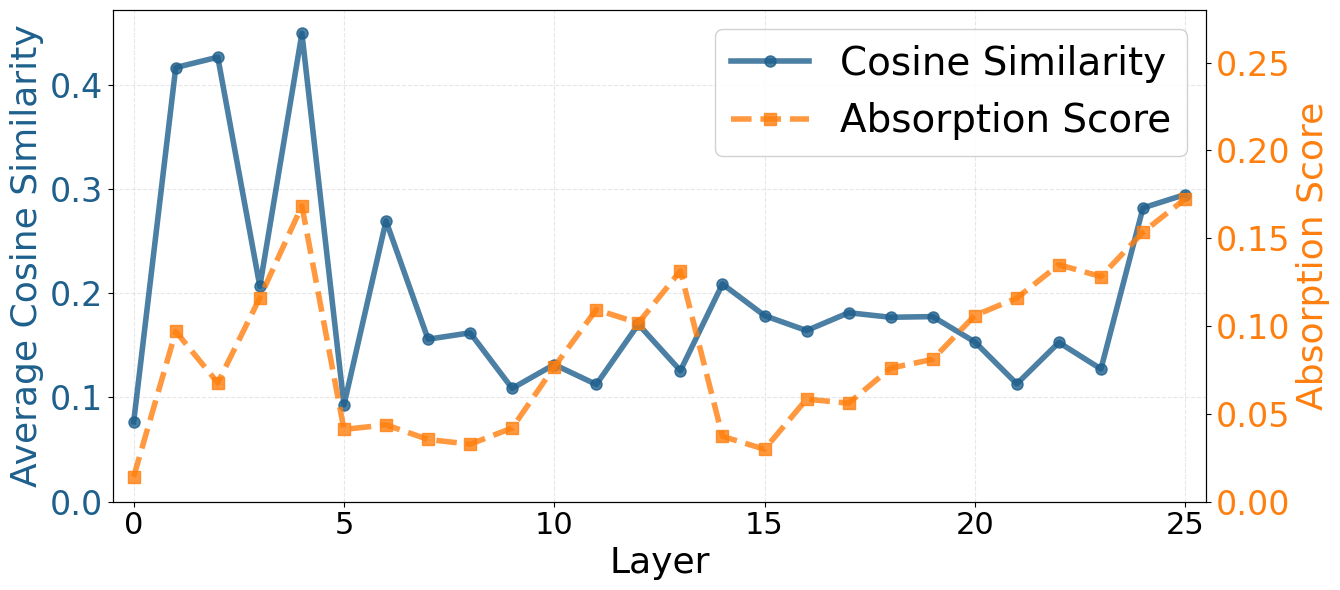

In [5]:
row_indices = np.arange(len(df_cos))
cos_sim_max = np.max(cos_sim_values)
absorption_max = np.max(absorption_values)

y_max = cos_sim_max

y_max_rounded = y_max * 1.05 

fig, ax1 = plt.subplots(figsize=(13.5, 6))

# left 
color1 = "#1E5F8C" 
ax1.set_xlabel('Layer', fontsize=26)
ax1.set_ylabel('Average Cosine Similarity', color=color1, fontsize=26)
line1 = ax1.plot(row_indices, cos_sim_values, color=color1, marker='o', 
                 linestyle='-', linewidth=4, markersize=8, label='Cosine Similarity', alpha=0.8)
ax1.set_ylim(0, y_max_rounded)  
ax1.tick_params(axis='y', labelcolor=color1,labelsize=24)

ax1.grid(True, linestyle='--', alpha=0.3)

# right：absorption_full
ax2 = ax1.twinx()
color2 = "#FF7F0E"
ax2.set_ylabel("Absorption Score", color=color2, fontsize=26) 
line2 = ax2.plot(row_indices, absorption_values, color=color2, marker='s', 
                 linestyle='--', linewidth=4, markersize=8, label="Absorption Score", alpha=0.8)
ax2.set_ylim(0, 0.28)  
ax2.tick_params(axis='y', labelcolor=color2,labelsize=24)

ax1.set_xlim(-0.5, len(row_indices) - 0.5)

# xtiscks
tick_positions = row_indices[::5] 
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_positions)

ax1.tick_params(axis='x', labelsize=22)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=28, framealpha=0.9)

plt.tight_layout()

output_path_png = f'../results/Layer-wiseSimilarity/Layer-wise_Average_Similarity.png'
plt.savefig(output_path_png,bbox_inches='tight', dpi=300)
print(f"Saved to: {output_path_png}")

plt.show()
